In [1]:
#IMPORT DATA
import matplotlib.pyplot as plt
import seaborn as sns 
import socket
import pandas as pd
import numpy as np
from sklearn import datasets
import sklearn.preprocessing as preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
socket.getaddrinfo('localhost', 8080)

DataLabels =["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
               "occupation", "relationship", "race", "sex", "capital-gain",
               "capital-loss", "hours-per-week", "native-country", "class"]

dataset = ('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
myData = pd.read_csv(dataset, header=None, names=DataLabels, sep=r'\s*,\s*', engine='python', na_values=["?"])

In [2]:
myData.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
myData.dropna(inplace=True)
myData.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
#INSTANCE, MISSING VALUE

print('Number of instances = %d' % (myData.shape[0]))
print('Number of attributes = %d' % (myData.shape[1]))

print('Number of missing values:')
for col in myData.columns:
    print('\t%s: %d' % (col,myData[col].isnull().sum()))

Number of instances = 30162
Number of attributes = 15
Number of missing values:
	age: 0
	workclass: 0
	fnlwgt: 0
	education: 0
	education-num: 0
	marital-status: 0
	occupation: 0
	relationship: 0
	race: 0
	sex: 0
	capital-gain: 0
	capital-loss: 0
	hours-per-week: 0
	native-country: 0
	class: 0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
def calc(paramData,label):
    X_train, X_test, Y_train, Y_test = train_test_split(paramData, label, test_size=.2, stratify=label, random_state=0)
    clf_DT = tree.DecisionTreeClassifier(random_state=0)
    clf_DT = clf_DT.fit(X_train, Y_train)

    hasil_testing_DT = clf_DT.predict(X_test)
    accuracy_DT = accuracy_score(Y_test, hasil_testing_DT)
    print(accuracy_DT)

    scores_DT = cross_val_score(clf_DT, paramData, label, cv=5)
    print(scores_DT)
    print(np.mean(scores_DT),'\n')

In [6]:
import pywt
import numpy as np
from sklearn import datasets

def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column].astype(str))
    return result, encoders

myData, _ = number_encode_features(myData)

adult = myData
data = adult.iloc[:, :13]
target = adult.iloc[:, 14]

(cA, cD) = pywt.dwt(data, 'db1')
print('Approximation result',cA.shape)
print('Detail results',cD.shape)
calc(cA,target)

Approximation result (30162, 7)
Detail results (30162, 7)
0.7951268025857782
[0.78584452 0.78601028 0.78882811 0.7821618  0.78063339]
0.7846956217003804 



In [7]:
cA

array([[3.11126984e+01, 5.48184532e+04, 1.20208153e+01, ...,
        3.53553391e+00, 1.53725014e+03, 5.65685425e+01],
       [3.81837662e+01, 5.89161370e+04, 1.06066017e+01, ...,
        3.53553391e+00, 0.00000000e+00, 1.83847763e+01],
       [2.82842712e+01, 1.52492527e+05, 6.36396103e+00, ...,
        3.53553391e+00, 0.00000000e+00, 5.65685425e+01],
       ...,
       [4.24264069e+01, 1.07424369e+05, 1.06066017e+01, ...,
        2.82842712e+00, 0.00000000e+00, 5.65685425e+01],
       [1.69705627e+01, 1.42482724e+05, 9.19238816e+00, ...,
        3.53553391e+00, 0.00000000e+00, 2.82842712e+01],
       [3.88908730e+01, 2.03602912e+05, 7.77817459e+00, ...,
        2.82842712e+00, 1.06235723e+04, 5.65685425e+01]])

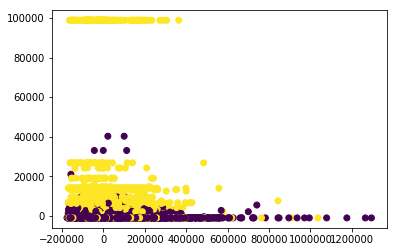

[[-112277.79837137    1085.4880163 ]
 [-106482.86297791   -1088.68291659]
 [  25852.13691132   -1092.61984299]
 ...
 [ -37883.86320026   -1090.72021277]
 [  11696.13713428   -1092.20352297]
 [  98133.5828825    13929.20710948]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA as sklearnPCA

adult = myData
data = adult.iloc[:, :13]
target = adult.iloc[:, 14]

#X_std = StandardScaler().fit_transform(data)

pca = sklearnPCA(n_components=2)
#Xstd_pca = pca.fit_transform(X_std)
X_pca = pca.fit_transform(data)

# target[target=='Setosa'] = 1
# target[target=='Virginica'] = 2
# target[target=='Versicolor'] = 3

plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', c=target)
plt.show()
print(X_pca)


In [9]:
calc(X_pca,target)

0.7349577324714073
[0.73230565 0.73644953 0.73711255 0.74071618 0.74879788]
0.7390763571004687 



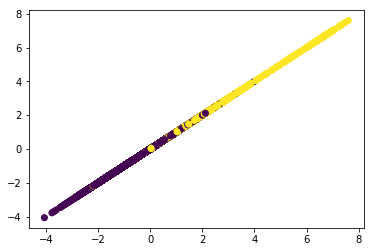

[[ 0.53543151]
 [ 0.66439094]
 [ 0.14958845]
 ...
 [-0.92402198]
 [-1.33826879]
 [ 0.03002571]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #newer version of sklearn
# from sklearn.lda import LDA #older version of sklearn
from sklearn import datasets

adult = myData
data = adult.iloc[:, :13]
target = adult.iloc[:, 14]

lda = LDA(n_components=2)
X_lda = lda.fit(data, target).transform(data)

# target[target=='Setosa'] = 1
# target[target=='Virginica'] = 2
# target[target=='Versicolor'] = 3


plt.scatter(X_lda[:, 0], X_lda[:, 0], marker='o', c=target)
plt.show()
print(X_lda)

In [11]:
calc(X_lda,target)

0.7364495275982098
[0.73479198 0.73644953 0.74738936 0.74320292 0.73619632]
0.7396060200747824 



In [12]:
print('Wavelet (Approximation)\n')
calc(cA,target)
print('PCA\n')
calc(X_pca,target)
print('LDA\n')
calc(X_lda,target)

Wavelet (Approximation)

0.7951268025857782
[0.78584452 0.78601028 0.78882811 0.7821618  0.78063339]
0.7846956217003804 

PCA

0.7349577324714073
[0.73230565 0.73644953 0.73711255 0.74071618 0.74879788]
0.7390763571004687 

LDA

0.7364495275982098
[0.73479198 0.73644953 0.74738936 0.74320292 0.73619632]
0.7396060200747824 



In [13]:
#feature selection (rank) filter-based

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import datasets
print(data.iloc[1:5,:])

selector = SelectKBest(mutual_info_classif, k=2).fit_transform(data, target) 
print(selector)

   age  workclass  fnlwgt  education  education-num  marital-status  \
1   50          4   83311          9             13               2   
2   38          2  215646         11              9               0   
3   53          2  234721          1              7               2   
4   28          2  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  
1              13  
2              40  
3              40  
4              40  
[[4 1]
 [2 0]
 [0 1]
 ...
 [6 4]
 [4 3]
 [2 5]]


In [14]:
# SAMPLING

#a sample of size 10 is randomly selected (without replacement) from the original data.

sample = myData.sample(n=10)
sample

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
20896,41,2,192107,9,13,2,2,0,4,1,0,0,40,38,0
11331,23,2,117789,9,13,4,3,3,4,0,0,0,40,38,0
1443,38,2,27997,8,11,0,2,1,4,1,0,0,40,38,0
16684,40,2,123306,8,11,2,9,0,4,1,0,0,40,38,1
3546,23,2,129583,11,9,4,5,3,2,0,0,0,16,38,0
24239,35,2,168322,1,7,2,4,0,4,1,0,0,40,38,0
14907,22,2,113062,9,13,4,9,3,4,0,0,0,40,38,0
15353,19,2,458558,11,9,2,2,5,4,0,0,0,40,38,0
282,34,2,175413,7,12,0,11,4,2,0,0,0,45,38,0
9056,22,2,235853,6,5,4,11,1,4,1,0,0,40,38,0


In [15]:
#randomly select 1% of the data (without replacement) and display the selected samples.

sample = myData.sample(frac=0.01, random_state=1)
sample

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
12488,30,2,202450,11,9,2,13,0,4,1,0,0,65,38,1
5130,40,2,217120,0,6,0,2,1,4,1,0,0,50,38,0
8616,23,2,240398,9,13,4,11,1,2,1,0,0,15,38,0
15453,47,5,100818,11,9,2,0,5,4,0,0,0,40,38,1
13555,43,2,191814,7,12,2,11,0,4,1,7688,0,50,38,1
21172,58,2,34788,15,10,2,11,0,4,1,0,1887,40,38,1
96,48,4,191277,10,16,2,9,0,4,1,0,1902,60,38,1
19635,37,2,167415,14,15,2,9,0,4,1,0,0,60,38,1
17245,52,2,217663,11,9,2,11,0,4,1,0,0,45,38,1
31916,18,2,218889,6,5,4,7,3,2,1,0,0,35,38,0


In [16]:
#a sampling with replacement to create a sample whose size is equal to 20% of the entire data.

sample = myData[:30].sample(frac=0.20, replace=True, random_state=1)
sample

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
11,30,5,141297,9,13,2,9,0,1,1,0,0,40,18,1
12,23,2,122272,9,13,4,0,3,4,0,0,0,30,38,0
8,31,2,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,2,159449,9,13,2,3,0,4,1,5178,0,40,38,1
11,30,5,141297,9,13,2,9,0,1,1,0,0,40,18,1


In [17]:
from sklearn.model_selection import train_test_split

Train, Test = train_test_split(myData, test_size=0.30, stratify=myData['class'])
Train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4159,25,2,306666,15,10,2,11,0,2,1,0,0,45,38,0
28970,33,2,181372,12,14,2,3,5,4,0,0,0,50,38,1
10965,52,2,129177,9,13,6,7,1,4,0,0,2824,20,38,1
29743,22,2,38251,7,12,4,7,4,4,0,0,0,35,38,0
1845,45,0,273194,11,9,4,13,1,2,1,3325,0,40,38,0
17610,61,2,133164,5,4,4,7,1,4,1,0,0,48,38,0
2074,36,1,126569,15,10,2,10,0,4,1,0,0,40,38,1
13262,41,2,287306,11,9,2,9,0,4,1,0,1902,40,38,1
954,51,2,133461,15,10,2,3,0,4,1,0,0,40,38,0
3362,29,2,136277,0,6,4,7,3,2,0,0,0,32,38,0


In [18]:
label1a = sum(myData['class']==0)
label1b = sum(Train['class']==0)
label2a = sum(myData['class']==1)
label2b = sum(Train['class']==1)
print('Jumlah kelas 0 sebenarnya', label1a)
print('Jumlah kelas 0 stratified sampling', label1b)
print('Jumlah kelas 1 sebenarnya', label2a)
print('Jumlah kelas 1 stratified sampling', label2b)

Jumlah kelas 0 sebenarnya 22654
Jumlah kelas 0 stratified sampling 15857
Jumlah kelas 1 sebenarnya 7508
Jumlah kelas 1 stratified sampling 5256


In [19]:
#CLUSTER SAMPLING

from sklearn.impute import SimpleImputer
imp_mode=Imputer(missing_values=np.NaN, strategy='most_frequent')
imp_mode.fit(myData)
clean_data = pd.DataFrame(imp_mode.transform(myData))
clean_data.columns = myData.columns
clean_data.index = myData.index

NameError: name 'Imputer' is not defined

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 2
test_size=0.7

data_without_class = clean_data.drop(columns='class')
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data_without_class)
selected_index=[]
for i in range(n_clusters):

    C_i = np.where(kmeans.labels_ == i)[0].tolist() 
    n_i = len(C_i) # number of points in cluster i
    
    
    sample_i = np.random.choice(C_i, int(test_size * n_i)) 
    selected_index.append(sample_i)
print('Index yang terpilih:',selected_index)

train1=myData.iloc[selected_index[0],:]
train2=myData.iloc[selected_index[1],:]

print('Jumlah data dari cluster pertama',len(train1['class']))
print('Jumlah data dari cluster kedua',len(train2['class']))

In [20]:
# 7. IMBALANCED

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from sklearn.decomposition import PCA

from sklearn import datasets
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

In [21]:
def convertTo2Dimension(paramData):
    pca = PCA(n_components=2)
    return pd.DataFrame(pca.fit_transform(paramData))

def generateListColor(paramData):
    color = []
    for single in paramData:
        if single == '0':
            color.append(0.6)
        else:
            color.append(0.3)
    return color

def printCount(name,paramData,target):
    print (name)
    print (paramData.shape)
    print (np.count_nonzero(target=='0'))
    print (np.count_nonzero(target=='1'))
    calc(paramData,target)
    print ('\n')

Original Data
(30162, 13)
0
0
0.8047405934029505
[0.80474059 0.79893917 0.81054202 0.80769231 0.80417841]
0.8052184998883067 



SMOTE
(45308, 13)
0
0
0.8469432796292209
[0.75457956 0.80942397 0.88843522 0.88711101 0.88410596]
0.8447311457055955 



ADASYN
(44955, 13)
0
0
0.8464019575130686
[0.74455071 0.7997998  0.88065844 0.87954621 0.87664071]
0.8362391745078448 



BorderlineSMOTE
(45308, 13)
0
0
0.8469432796292209
[0.75457956 0.80942397 0.88843522 0.88711101 0.88410596]
0.8447311457055955 



SMOTE + TOMEK Links
(43151, 13)
0
0
0.8555207971266365
[0.76097787 0.81635963 0.88725377 0.88748552 0.89199212]
0.8488137811034822 



ADASYN + TOMEK Links
(42787, 13)
0
0
0.8423697125496611
[0.73746933 0.80320206 0.88301975 0.88442211 0.8751899 ]
0.8366606301586759 



BorderlineSMOTE + TOMEK Links
(43151, 13)
0
0
0.8555207971266365
[0.76097787 0.81635963 0.88725377 0.88748552 0.89199212]
0.8488137811034822 





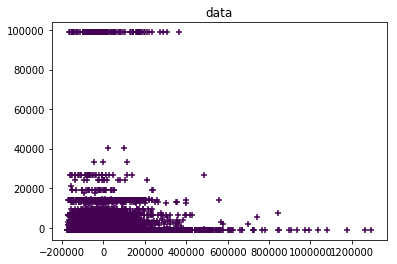

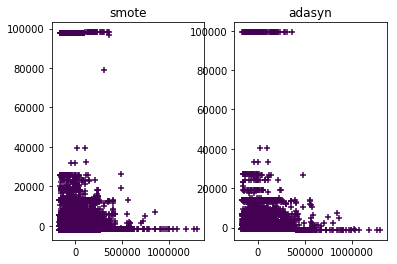

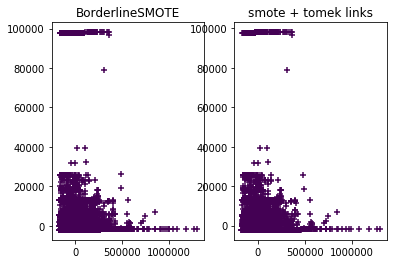

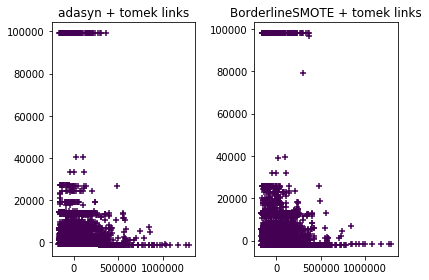

In [22]:
fig, (ax1) = plt.subplots(1, 1)
fig, (ax2, ax3) = plt.subplots(1, 2)
fig, (ax4, ax5) = plt.subplots(1, 2)
fig, (ax6, ax7) = plt.subplots(1, 2)

printCount('Original Data',data.values,target.values)
Y_pd = convertTo2Dimension(data);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(target)
ax1.scatter(x, y, c=color,marker='+');
ax1.set_title('data')

#Smote
sm = SMOTE(ratio = 'auto', random_state=0)
new_data_smote, new_target_smote = sm.fit_sample(data, target)
printCount('SMOTE',new_data_smote,new_target_smote)

Y_pd = convertTo2Dimension(new_data_smote);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_smote)
ax2.scatter(x, y, c=color,marker='+');
ax2.set_title('smote')

#adasyn
ada = ADASYN(ratio = 'auto', random_state=0)
new_data_adasyn, new_target_adasyn = ada.fit_sample(data, target)
printCount('ADASYN',new_data_adasyn,new_target_adasyn)

Y_pd = convertTo2Dimension(new_data_adasyn);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_adasyn)
ax3.scatter(x, y, c=color,marker='+');
ax3.set_title('adasyn')

#BorderlineSmote
blsm = BorderlineSMOTE(random_state=0)
new_data_blsmote, new_target_blsmote = sm.fit_sample(data, target)
printCount('BorderlineSMOTE',new_data_blsmote,new_target_blsmote)

Y_pd = convertTo2Dimension(new_data_smote);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_smote)
ax4.scatter(x, y, c=color,marker='+');
ax4.set_title('BorderlineSMOTE')

#Tomek Links
tl = TomekLinks(random_state = 0, ratio = 'not minority', return_indices=True)
new_data_smote_tomek, new_target_smote_tomek, idx_new = tl.fit_sample(new_data_smote,new_target_smote)
printCount('SMOTE + TOMEK Links',new_data_smote_tomek,new_target_smote_tomek)

Y_pd = convertTo2Dimension(new_data_smote_tomek);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_smote_tomek)
ax5.scatter(x, y, c=color,marker='+');
ax5.set_title('smote + tomek links')

t2 = TomekLinks(random_state = 0, ratio = 'not minority', return_indices=True)
new_data_adasyn_tomek, new_target_adasyn_tomek, idx_new = t2.fit_sample(new_data_adasyn,new_target_adasyn)
printCount('ADASYN + TOMEK Links',new_data_adasyn_tomek,new_target_adasyn_tomek)

Y_pd = convertTo2Dimension(new_data_adasyn_tomek);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_adasyn_tomek)
ax6.scatter(x, y, c=color,marker='+');
ax6.set_title('adasyn + tomek links')

t3 = TomekLinks(random_state = 0, ratio = 'not minority', return_indices=True)
new_data_blsmote_tomek, new_target_blsmote_tomek, idx_new = t3.fit_sample(new_data_blsmote,new_target_blsmote)
printCount('BorderlineSMOTE + TOMEK Links',new_data_blsmote_tomek,new_target_blsmote_tomek)

Y_pd = convertTo2Dimension(new_data_blsmote_tomek);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_blsmote_tomek)
ax7.scatter(x, y, c=color,marker='+');
ax7.set_title('BorderlineSMOTE + tomek links')

fig.tight_layout()
plt.show()